# Analisi dei dati del covid19 in Italia
Questa analisi dati è stata svolta prendendo i dati rilasciati dalla protezione civile sul covid19 in Italia.


- Autore: Matteo Marulli & Matteo Ghera
- Università degli studi di Firenze
- Corso di laurea magistrale in Informatica
- Curriculum: Data Science

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from path import Path
import json

In [2]:
PROJ_DIR = Path().getcwd().parent
DATA_DIR = PROJ_DIR / "data"
os.chdir (PROJ_DIR)

with open(DATA_DIR/'dpc-covid19-ita-province.json') as f:
         d= json.load(f)
json.dumps(d)
df_province =pd.DataFrame(d)

with open(DATA_DIR/'dpc-covid19-ita-regioni.json') as f:
         d= json.load(f)
json.dumps(d)
df_regioni =pd.DataFrame(d)

In [3]:
df_province.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
0,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,,
1,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,,
2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,,
3,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,,
4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,,0.000000,0.000000,0,,


In [4]:
df_regioni.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,0,5,NaN,,
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,0,NaN,,
2,2020-02-24T18:00:00,ITA,21,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,0,1,NaN,,
3,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,0,1,NaN,,
4,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,0,10,NaN,,


## Descrizione dei dataset
Il dataset regioni è composto da 16 variaibili e molte variabili sono di tipo int64 e float 64.
Le variabili prese in analisi sono:
- data: è il timestamp indica quando è stato inserito il record nel database, deve essere convertito nel formato date
- stato: indica lo stato in è stato rilevato il caso (tipo qualitativo e non ordinale)
- codice_regione: codice istat per identificare una regione (tipo quantitativo e non ordinale)
- denominazione_regione: indica il nome della regione, (tipo qualitativo e non ordinale)
- lat: latidudine della regione (tipo quantitativo e ordinale)
- long: longitudine della regione (tipo quantitativo e ordinale)
- ricoverati_con_sintomi: numero di persone che sono state ricoverate nel giorno indicato da data (tipo quantitativo e ordianale)
- terapia_intesiva: numero di persone che sono state ricoverate/spostate in terapia intensiva nel giorno indicato da data (tipo quantitativo e ordianale)
- totale_ospedalizzati: numero di persone che sono state ricoverate in ospedale (somma tra quelli in tp.intensiva e ricoverati con sintomi) nel giorno indicato da data (tipo quantitativo e ordianale)
- isolamento_domiciliare: numero di persone che sono insolamento_domiciliare nel giorno indicato da data (tipo quantitativo e ordianale)
- totale_attualmente_positivi: numero di persone in isolamento e ricoverati in ospedale nel giorno indicato da data (tipo quantitativo e ordianale)
- nuovi_attualmente_positivi: differenza di persone positive al Covid19 tra il giorno attuale e il giorno passato (tipo quantitativo e ordianale)
- dimessi_guariti: persone guarite dal covid19 nella giornata indicata da data (tipo quantitativo e ordianale)
- deceduti: persone morte a causa del covid19 nella giornata indicata da data (tipo quantitativo e ordianale)
- totale_casi: totale casi positivi nella giornata indicata da data (tipo quantitativo e ordianale)
- tamponi: numerod i campioni fatti dalla regione nella giornata indicata da data (tipo quantitativo e ordianale)

Il dataset province è composto da 12 variaibili.
Le variabili prese in analisi sono:
- data: è il timestamp indica quando è stato inserito il record nel database, deve essere convertito nel formato date (tipo qualitativo e non ordinale)
- stato: indica lo stato, verrà cancellata nel preprocessing (tipo qualitativo e non ordinale)
- codice_regione: codice istat per identificare una regione (tipo quantitativo e non ordinale)
- denominazione_regione: indica il nome della regione (tipo qualitativo e non ordinale)
- lat: latidudine della città (tipo quantitativo e ordinale)
- long: longitudine della città (tipo quantitativo e ordinale)
- codice_provincia: codice istat per identificare una provincia (tipo quantitativo e non ordinale)
- denominanzione_provincia: indica il nome della provincia (tipo qualitativo e non ordinale)
- sigla_provincia: sigla della provincia usate per le targe auto (tipo qualitativo e non ordinale)
- totale_casi: persone infette da covid19 (tipo quantitativo e ordianale)
- note_it: note informative in italiano (tipo qualitativo e non ordinale)
- note_en: note informative in inglese (tipo qualitativo e non ordinale)
- casi_testati: numero di persone sottoposte al test per covid-19


Le colonne in comune nei due dataset sono:
- data
- stato
- note_en
- note_it
- codice_regione
- totale_casi
- denominazione_regione
- lat
- long

Le colonne candidate per eseguire la join sono data e denominazione_regione

In [5]:
set(df_regioni.columns).intersection(set(df_province.columns))

{'codice_regione',
 'data',
 'denominazione_regione',
 'lat',
 'long',
 'note_en',
 'note_it',
 'stato',
 'totale_casi'}

In [6]:
joinDF = pd.merge(df_province, df_regioni, on= ['data', 'codice_regione'])
joinDF.drop(axis=1, columns = joinDF.filter(regex='_y').columns, inplace = True) #va salvata la colonna totale_casi_y che è diversa da totale_casi_x

In [7]:
joinDF.head().T

,0,1,2,3,4
data,2020-02-24T18:00:00,2020-02-24T18:00:00,2020-02-24T18:00:00,2020-02-24T18:00:00,2020-02-24T18:00:00
stato_x,ITA,ITA,ITA,ITA,ITA
codice_regione,13,13,13,13,13
denominazione_regione_x,Abruzzo,Abruzzo,Abruzzo,Abruzzo,Abruzzo
codice_provincia,69,66,68,67,979
denominazione_provincia,Chieti,L'Aquila,Pescara,Teramo,In fase di definizione/aggiornamento
sigla_provincia,CH,AQ,PE,TE,
lat_x,42.351,42.3512,42.4646,42.6589,0
long_x,14.1675,13.3984,14.2136,13.7044,0
totale_casi_x,0,0,0,0,0


In [8]:
joinDF.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10496 entries, 0 to 10495
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   data                        10496 non-null  object 
 1   stato_x                     10496 non-null  object 
 2   codice_regione              10496 non-null  int64  
 3   denominazione_regione_x     10496 non-null  object 
 4   codice_provincia            10496 non-null  int64  
 5   denominazione_provincia     10496 non-null  object 
 6   sigla_provincia             10496 non-null  object 
 7   lat_x                       10496 non-null  float64
 8   long_x                      10496 non-null  float64
 9   totale_casi_x               10496 non-null  int64  
 10  note_it_x                   10496 non-null  object 
 11  note_en_x                   10496 non-null  object 
 12  ricoverati_con_sintomi      10496 non-null  int64  
 13  terapia_intensiva           104

In [9]:
joinDF.describe()

,codice_regione,codice_provincia,lat_x,long_x,totale_casi_x,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,tamponi,casi_testati
count,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,3840.000000
mean,10.687500,207.523438,35.868843,10.112000,958.071456,1351.166921,156.793921,1507.960842,3525.129192,5033.090034,61.449409,207.873666,3019.164158,1309.605850,71229.496475,96180.685938
std,6.127524,347.399578,16.072290,5.097835,2048.274448,2488.958976,260.958626,2742.322356,5716.724056,8033.131626,343.468372,375.870174,6636.474909,3062.891965,105351.765570,78414.535733
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5339.000000,-18.000000,0.000000,0.000000,0.000000,3482.000000
25%,5.750000,32.750000,38.848542,8.583304,20.000000,91.000000,13.000000,106.000000,216.000000,396.000000,-11.000000,14.000000,19.000000,22.000000,4895.750000,35107.000000
50%,10.000000,64.500000,42.609815,11.188560,253.000000,397.000000,58.000000,443.000000,1343.000000,1942.000000,16.000000,61.000000,381.000000,220.000000,29241.000000,66269.000000
75%,16.000000,96.250000,44.947714,13.593962,966.000000,1169.000000,184.000000,1389.000000,3906.000000,5427.000000,103.000000,196.000000,2116.000000,874.000000,88384.000000,138830.000000
max,22.000000,999.000000,46.499335,18.171897,22222.000000,12077.000000,1381.000000,13328.000000,30382.000000,37307.000000,1950.000000,3251.000000,42403.000000,15543.000000,581437.000000,343213.000000


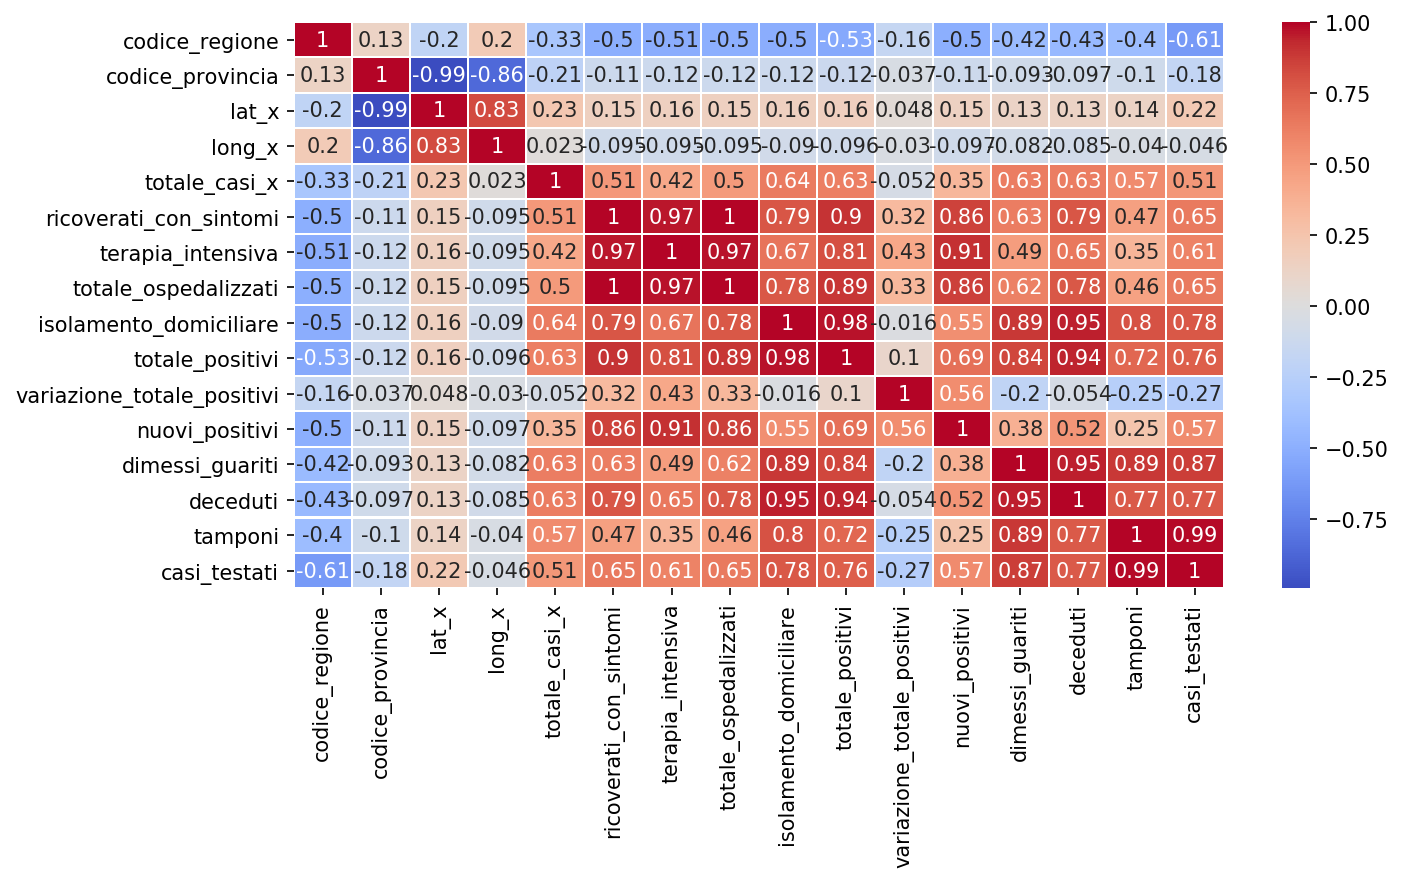

In [10]:
plt.figure(figsize=(10,5), dpi = 150)
sns.heatmap(joinDF.corr(), annot=True, linewidths= 0.5 , cmap = 'coolwarm')

In [11]:
#sns.pairplot(data=joinDF)

## Data cleaning

In [12]:
joinDF.columns = joinDF.columns.str.replace('_x','')

In [13]:
joinDF['data'] = pd.to_datetime(joinDF['data'], format='%Y-%m-%d') 

In [14]:
#joinDF[(joinDF['denominazione_regione_y'] == 'Lombardia')&(joinDF['data']>='2020-02-24')& (joinDF['data']<='2020-02-28')]

In [15]:
joinDF.drop(columns=['stato', 'codice_regione', 'note_en', 'note_it', 'codice_regione', 'codice_provincia','sigla_provincia'], axis=1, inplace = True)

In [16]:
joinDF['casi_testati'].fillna(joinDF['casi_testati'].mean(), inplace = True)

In [17]:
#multi = pd.MultiIndex.from_tuples([(regione, data) for regione,data in zip(joinDF['denominazione_regione'],joinDF['data'])], names =['denominazione_regione', 'data'])

In [18]:
#joinDF.index = multi

In [19]:
joinDF.pivot_table(index = ['denominazione_regione', 'denominazione_provincia'])

casi_testati  \
denominazione_regione denominazione_provincia                               
Abruzzo               Chieti                                 72163.922790   
                      In fase di definizione/aggiornamento   72163.922790   
                      L'Aquila                               72163.922790   
                      Pescara                                72163.922790   
                      Teramo                                 72163.922790   
...                                                                   ...   
Veneto                Rovigo                                141418.874009   
                      Treviso                               141418.874009   
                      Venezia                               141418.874009   
                      Verona                                141418.874009   
                      Vicenza                               141418.874009   

                                                              deceduti  \
denominazione_regione denominazione_provincia                            
Abruzzo               Chieti                                172.378049   
                      In fase di definizione/aggiornamento  172.378049   
                      L'Aquila                              172.378049   
                      Pescara                               172.378049   
                      Teramo                                172.378049   
...                                                                ...   
Veneto                Rovigo                                766.365854   
                      Treviso                               766.365854   
                      Venezia                               766.365854   
                      Verona                                766.365854   
                      Vicenza                               766.365854   

                                                            dimessi_guariti  \
denominazione_regione denominazione_provincia                                 
Abruzzo               Chieti                                     346.658537   
                      In fase di definizione/aggiornamento       346.658537   
                      L'Aquila                                   346.658537   
                      Pescara                                    346.658537   
                      Teramo                                     346.658537   
...                                                                     ...   
Veneto                Rovigo                                    3933.756098   
                      Treviso                                   3933.756098   
                      Venezia                                   3933.756098   
                      Verona                                    3933.756098   
                      Vicenza                                   3933.756098   

                                                            isolamento_domiciliare  \
denominazione_regione denominazione_provincia                                        
Abruzzo               Chieti                                            897.353659   
                      In fase di definizione/aggiornamento              897.353659   
                      L'Aquila                                          897.353659   
                      Pescara                                           897.353659   
                      Teramo                                            897.353659   
...                                                                            ...   
Veneto                Rovigo                                           4939.182927   
                      Treviso                                          4939.182927   
                      Venezia                                          4939.182927   
                      Verona                                           4939.182927   
                      Vicenza       

In [20]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [21]:
titanic[titanic['sex']=='male']['survived'].mean()

0.18890814558058924

In [22]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [23]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack() # calcolo la media dei sopravissuti per ogni classe divisa tra maschi e femminie

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [24]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [25]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class') #calcola la media dei sopravissuti per ogni classe divisi per maschi e femmini di età 0, 18 e 18,80

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [26]:
joinDF.pivot_table('totale_positivi', index = ['denominazione_regione', 'denominazione_provincia'], columns=['data'], aggfunc='sum')

data                                                        2020-02-24 18:00:00  \
denominazione_regione denominazione_provincia                                     
Abruzzo               Chieti                                                  0   
                      In fase di definizione/aggiornamento                    0   
                      L'Aquila                                                0   
                      Pescara                                                 0   
                      Teramo                                                  0   
...                                                                         ...   
Veneto                Rovigo                                                 32   
                      Treviso                                                32   
                      Venezia                                                32   
                      Verona                                                 32   
                      Vicenza                                                32   

data                                                        2020-02-25 18:00:00  \
denominazione_regione denominazione_provincia                                     
Abruzzo               Chieti                                                  0   
                      In fase di definizione/aggiornamento                    0   
                      L'Aquila                                                0   
                      Pescara                                                 0   
                      Teramo                                                  0   
...                                                                         ...   
Veneto                Rovigo                                                 42   
                      Treviso                                                42   
                      Venezia                                                42   
                      Verona                                                 42   
                      Vicenza                                                42   

data                                                        2020-02-26 18:00:00  \
denominazione_regione denominazione_provincia                                     
Abruzzo               Chieti                                                  0   
                      In fase di definizione/aggiornamento                    0   
                      L'Aquila                                                0   
                      Pescara                                                 0   
                      Teramo                                                  0   
...                                                                         ...   
Veneto                Rovigo                                                 69   
                      Treviso                                                69   
                      Venezia                                                69   
                      Verona                                                 69   
                      Vicenza                                                69   

data                                                        2020-02-27 18:00:00  \
denominazione_regione denominazione_provincia                                     
Abruzzo               Chieti                                                  1   
                      In fase di definizione/aggiornamento                    1   
                      L'Aquila                                                1   
                      Pescara                                                 1   
                      Teramo                                                  1   
...                                                                         ...   
Veneto                Rovigo                                                109   
             

In [27]:
plt.figure(figsize=(12,6), dpi = 200)
joinDF.pivot_table('totale_positivi', index=['denominazione_regione', 'data'], aggfunc='sum' )

totale_positivi
denominazione_regione data                                
Abruzzo               2020-02-24 18:00:00                0
                      2020-02-25 18:00:00                0
                      2020-02-26 18:00:00                0
                      2020-02-27 18:00:00                5
                      2020-02-28 18:00:00                5
...                                                    ...
Veneto                2020-05-14 17:00:00            37744
                      2020-05-15 17:00:00            35512
                      2020-05-16 17:00:00            33296
                      2020-05-17 17:00:00            32328
                      2020-05-18 17:00:00            32032

[1722 rows x 1 columns]

<Figure size 2400x1200 with 0 Axes>

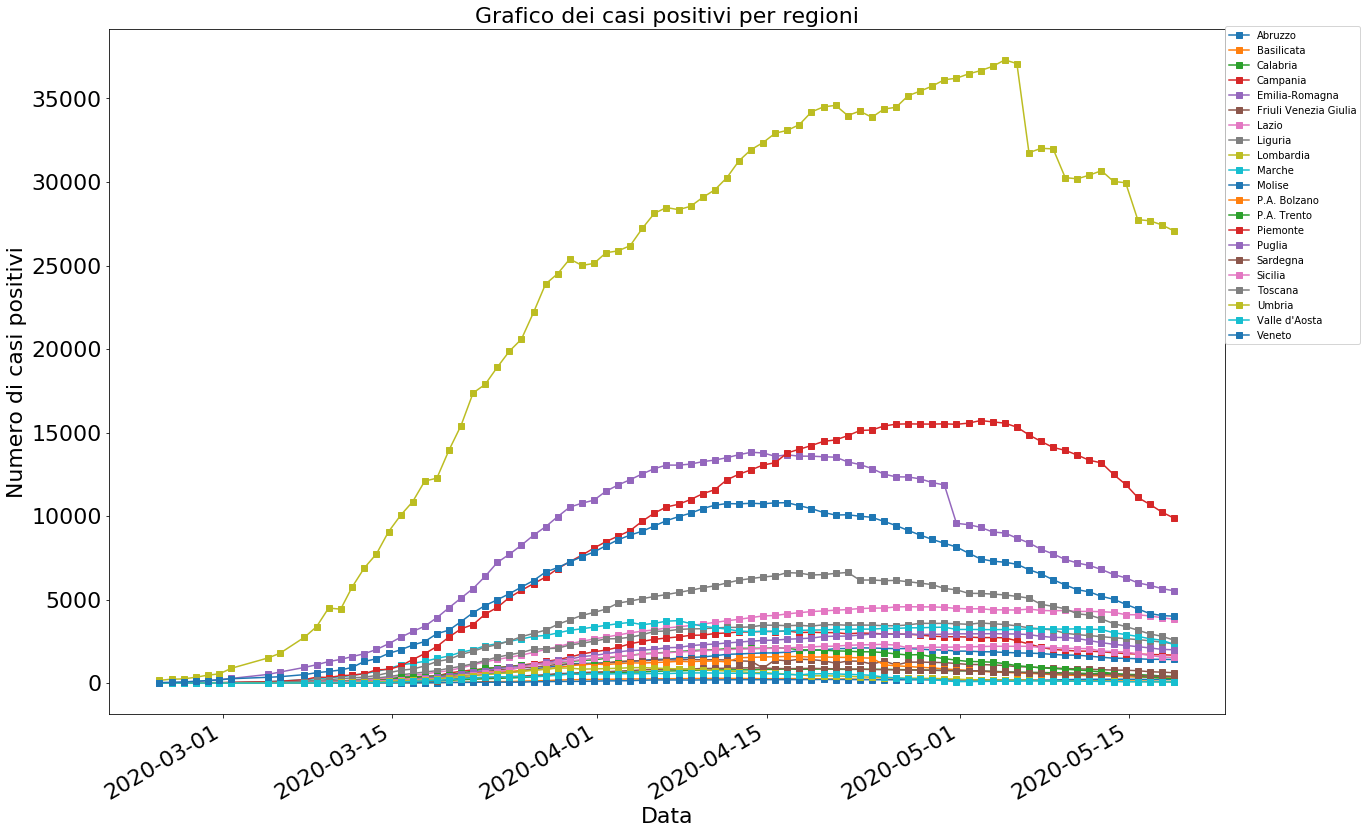

In [28]:
casiPositviPerRegioni = joinDF.pivot_table('totale_positivi', index=['data'], columns=['denominazione_regione'], aggfunc='max' )
casiPositviPerRegioni.plot(figsize=(20,14), marker='s', fontsize=22)
plt.title('Grafico dei casi positivi per regioni', size = 22)
plt.xlabel('Data',size = 22)
plt.ylabel('Numero di casi positivi', size = 22 )
plt.legend(loc=(1,0.54))

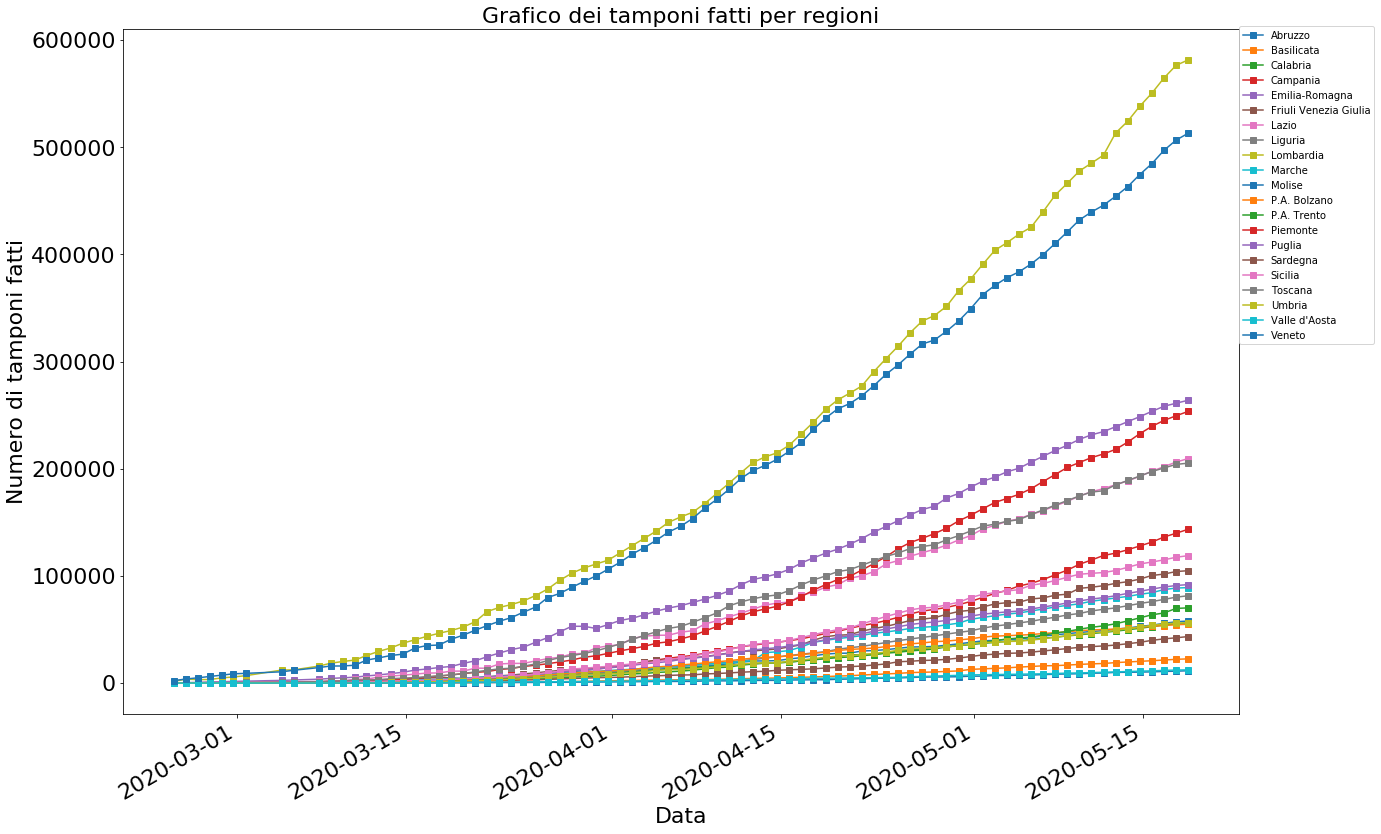

In [29]:
tamponiPerRegioni = joinDF.pivot_table('tamponi', index=['data'], columns=['denominazione_regione'], aggfunc='max' )
tamponiPerRegioni.plot(figsize=(20,14), marker='s', fontsize=22)
plt.title('Grafico dei tamponi fatti per regioni', size = 22)
plt.xlabel('Data',size = 22)
plt.ylabel('Numero di tamponi fatti', size = 22 )
plt.legend(loc=(1,0.54))

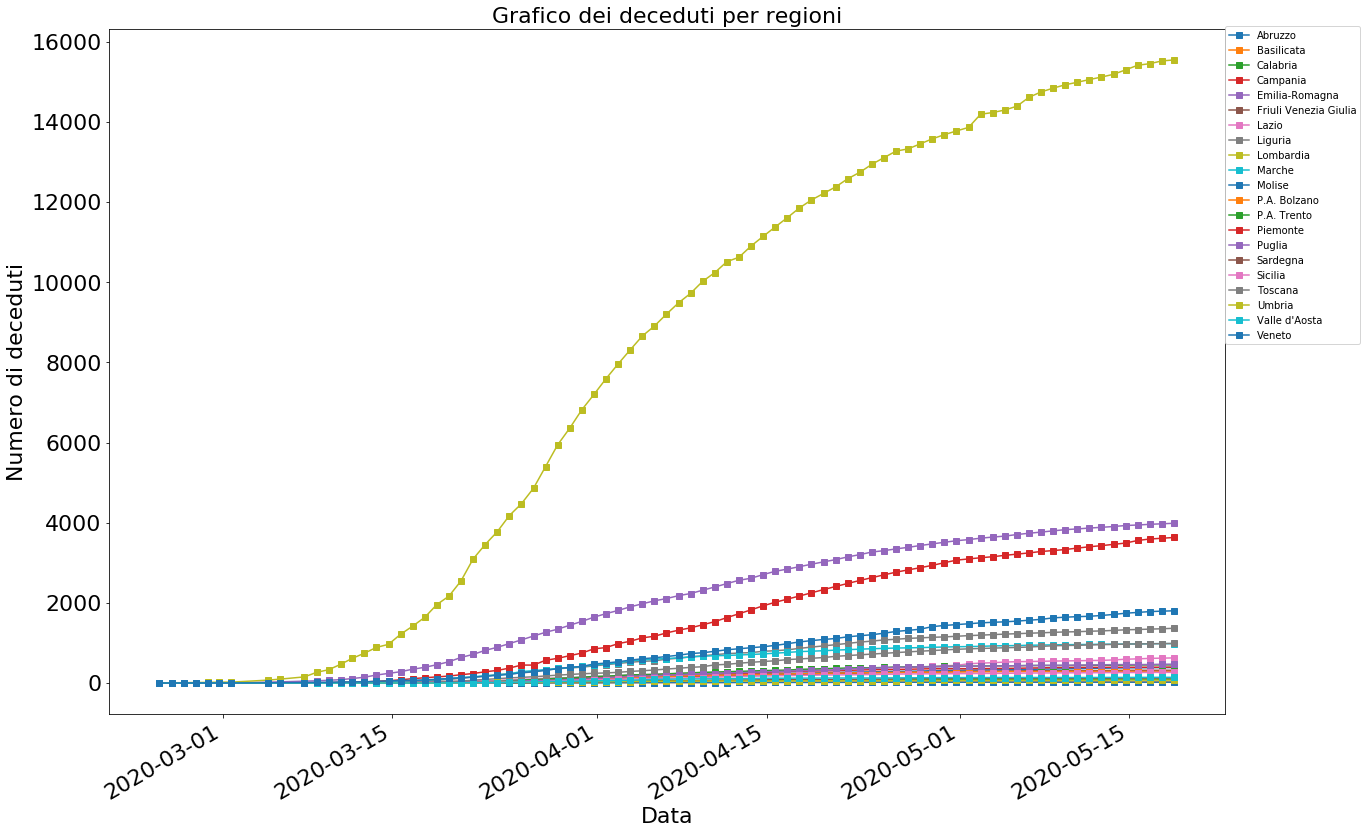

In [30]:
decedutiPerRegioni = joinDF.pivot_table('deceduti', index=['data'], columns=['denominazione_regione'], aggfunc='max' )
decedutiPerRegioni.plot(figsize=(20,14), marker='s', fontsize=22)
plt.title('Grafico dei deceduti per regioni', size = 22)
plt.xlabel('Data',size = 22)
plt.ylabel('Numero di deceduti', size = 22 )
plt.legend(loc=(1,0.54))

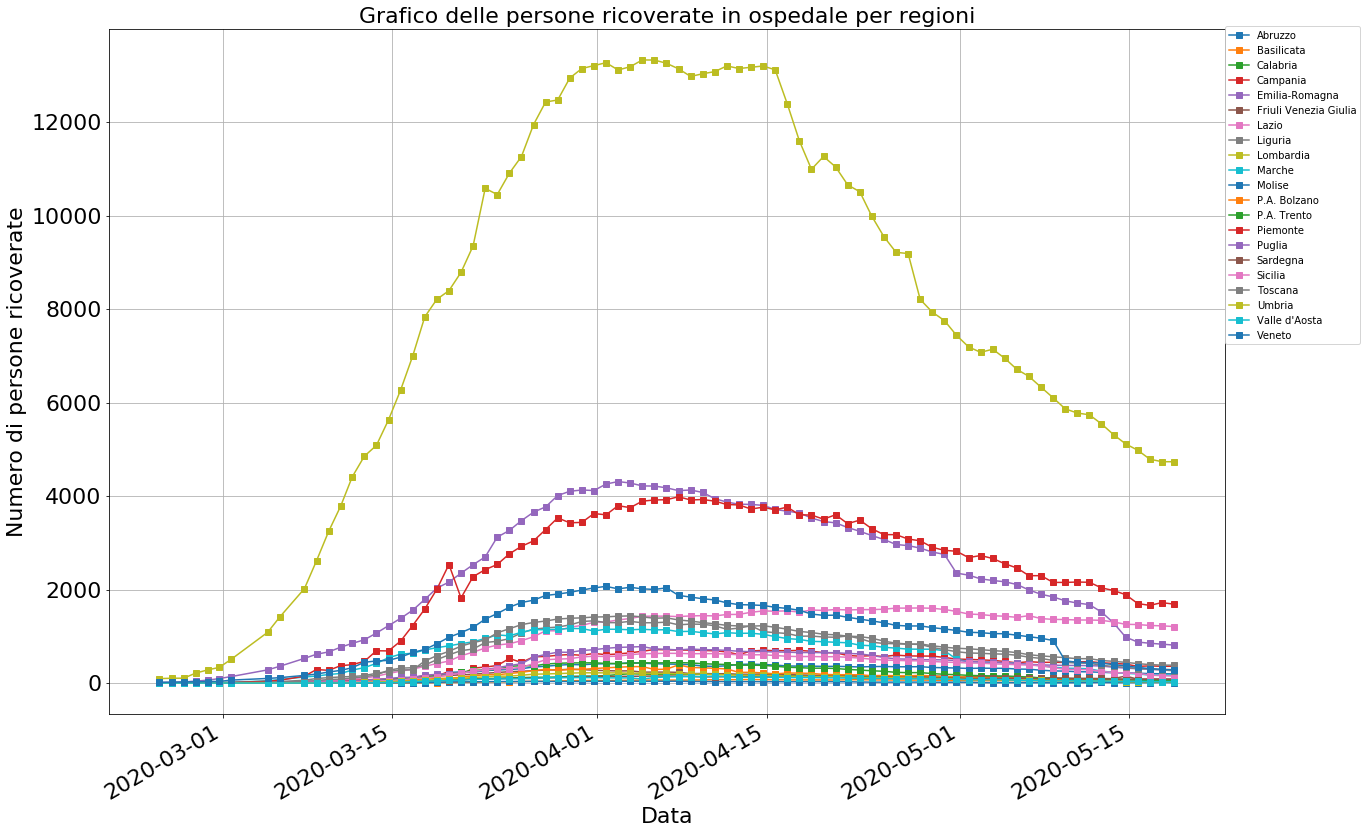

In [31]:
ospedalizzatiPerRegioni = joinDF.pivot_table(values = 'totale_ospedalizzati', index=['data'], columns=['denominazione_regione'], aggfunc='max' )
ospedalizzatiPerRegioni.plot(figsize=(20,14), marker='s', fontsize=22)
plt.title('Grafico delle persone ricoverate in ospedale per regioni', size = 22)
plt.xlabel('Data',size = 22)
plt.ylabel('Numero di persone ricoverate', size = 22 )
plt.legend(loc=(1,0.54))
plt.grid()

No handles with labels found to put in legend.


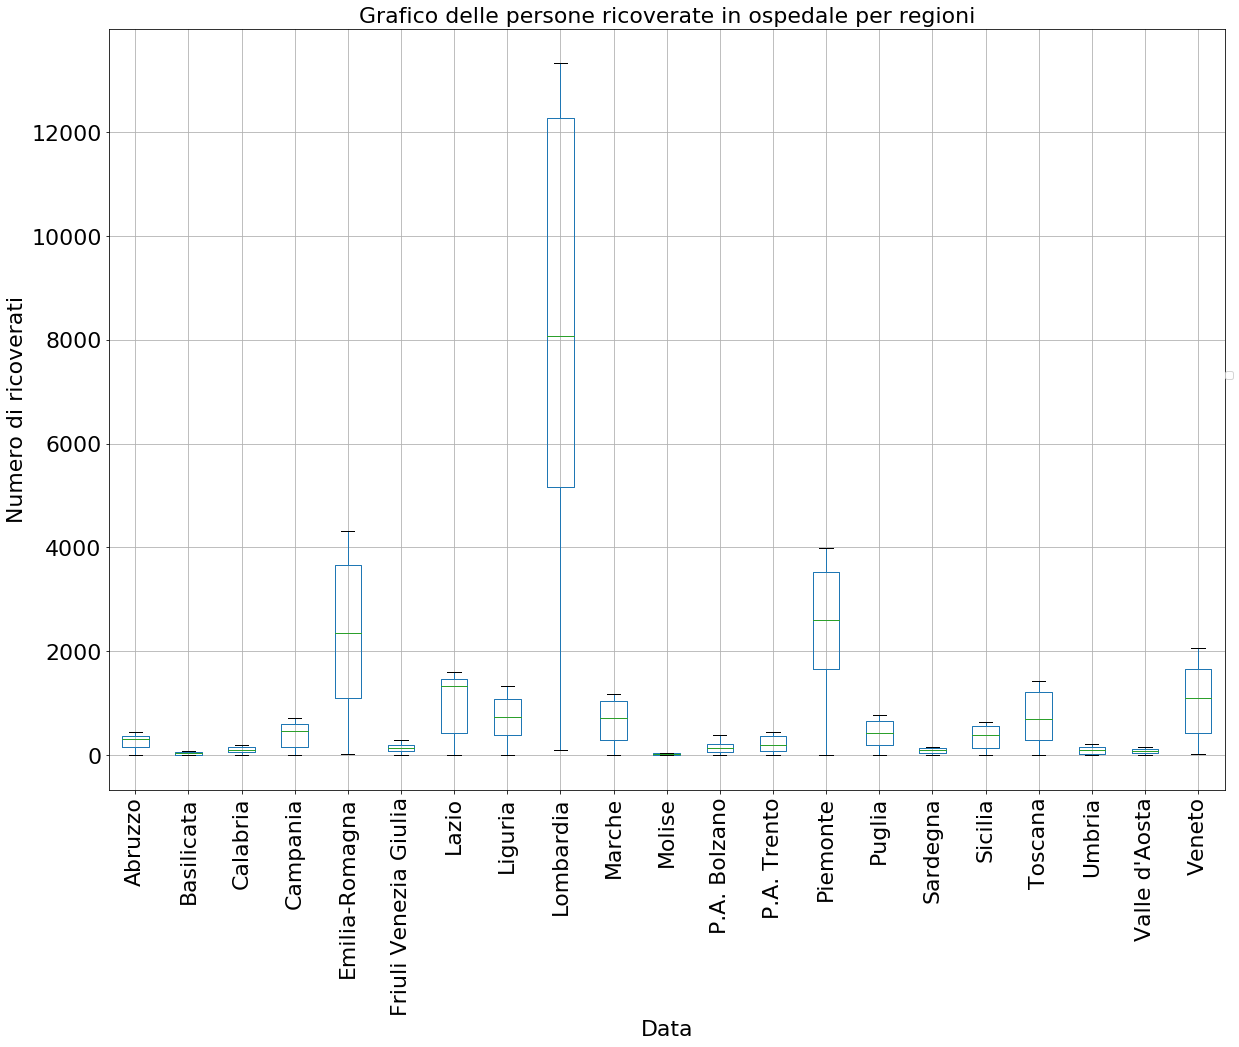

In [32]:
ospedalizzatiPerRegioni.boxplot(figsize=(20,14), fontsize=22)
plt.title('Grafico delle persone ricoverate in ospedale per regioni', size = 22)
plt.xlabel('Data',size = 22)
plt.xticks(rotation=90)
plt.ylabel('Numero di ricoverati', size = 22 )
plt.legend(loc=(1,0.54))

Text(0, 0.5, 'Regioni')

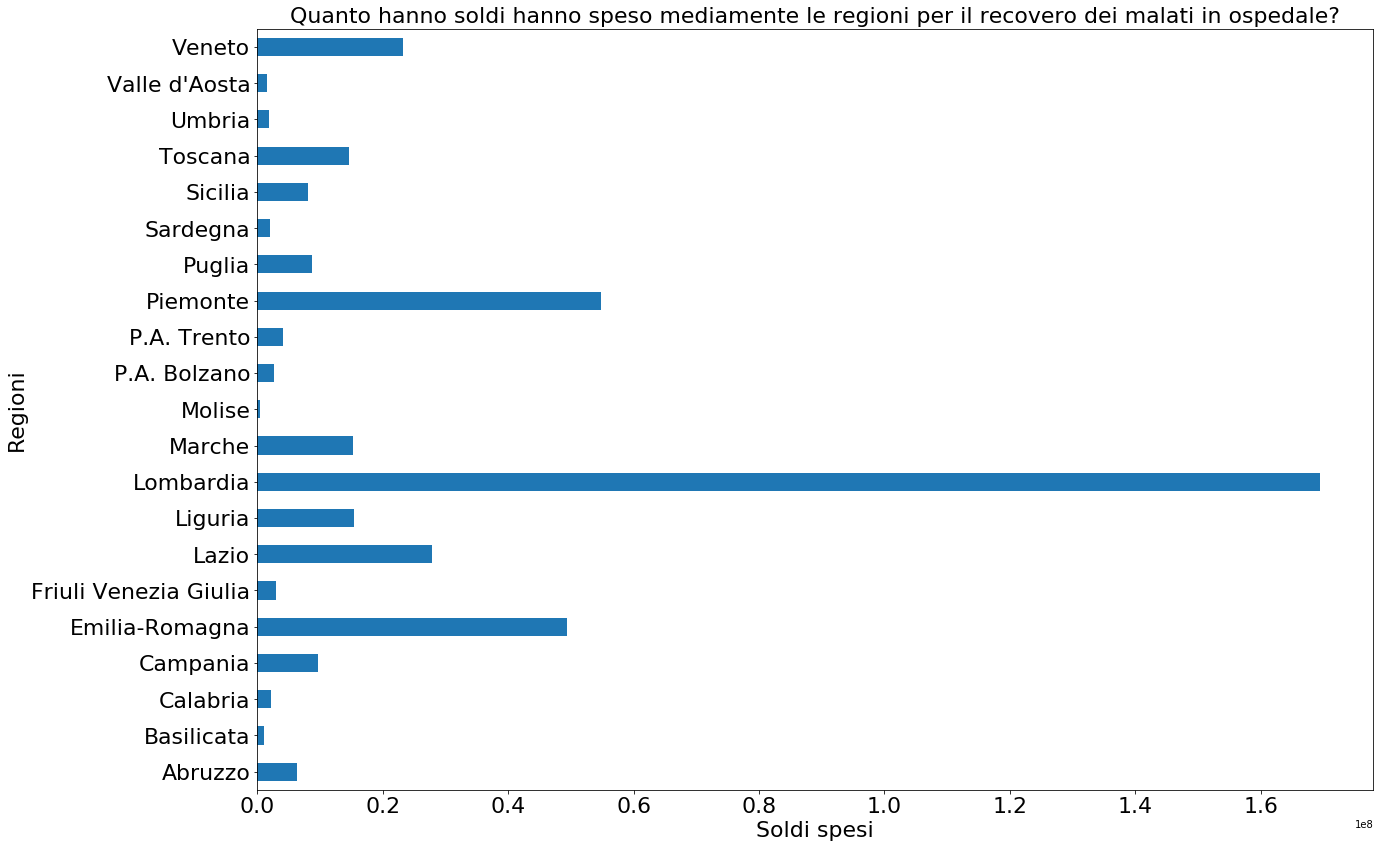

In [33]:
(ospedalizzatiPerRegioni.median()*1500*14).plot(kind='barh', figsize=(20,14))
plt.title('Quanto hanno soldi hanno speso mediamente le regioni per il recovero dei malati in ospedale?', size = 22)
plt.xlabel('Soldi spesi',size = 22)
plt.xticks(size=22)
plt.yticks(size=22)
plt.ylabel('Regioni', size = 22 )

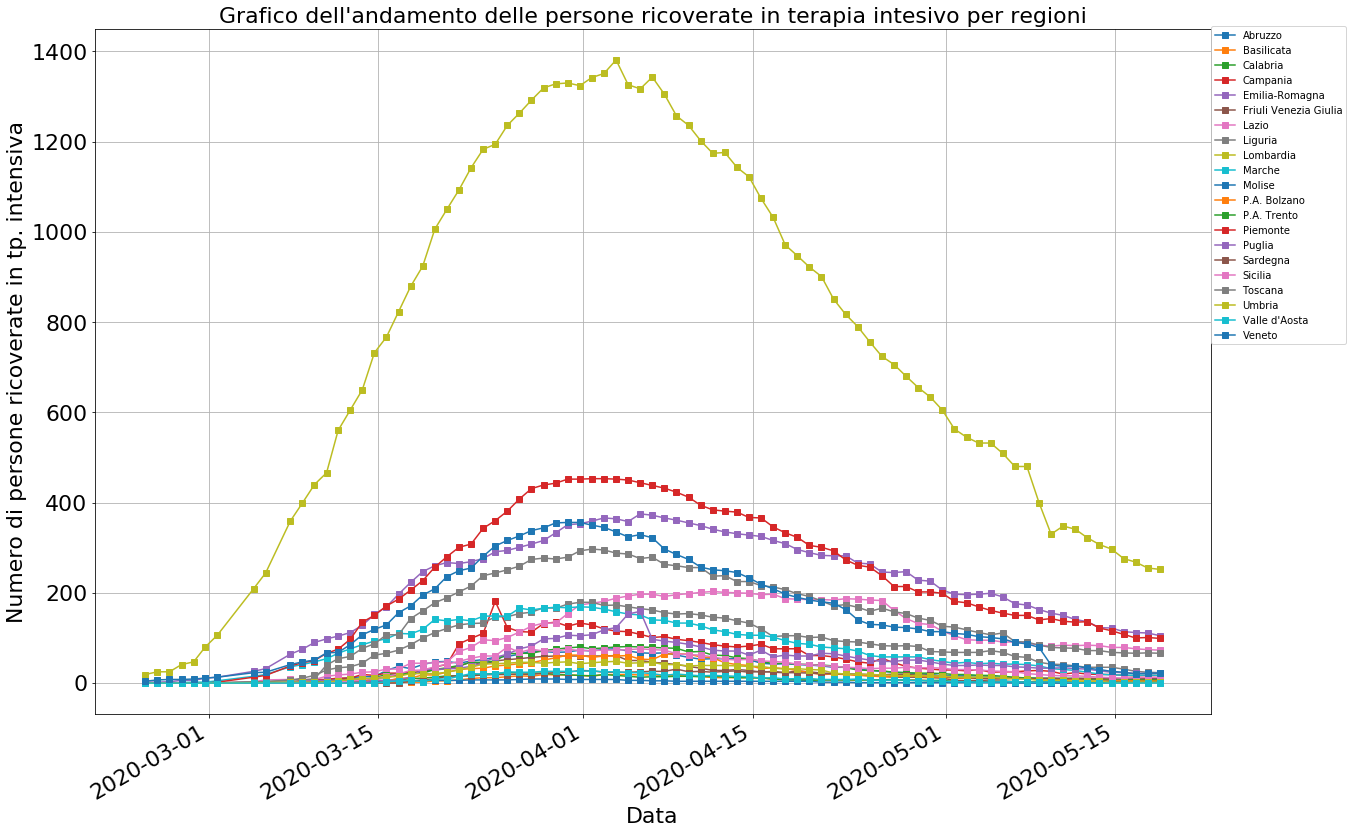

In [51]:
terapiaIntsPerRegioni = joinDF.pivot_table(values = 'terapia_intensiva', index=['data'], columns=['denominazione_regione'], aggfunc='max' )
terapiaIntsPerRegioni.plot(figsize=(20,14), marker='s', fontsize=22)
plt.title("Grafico dell'andamento delle persone ricoverate in terapia intesivo per regioni", size = 22)
plt.xlabel('Data',size = 22)
plt.ylabel('Numero di persone ricoverate in tp. intensiva', size = 22 )
plt.legend(loc=(1,0.54))
plt.grid()

In [ ]:
terapiaIntsPerRegioni['2020-03-25'].plot(kind='bar', figsize=(14,10))
plt.title("Grafico dell'andamento delle persone ricoverate in terapia intesivo per regioni", size = 22)
plt.axhline(y=6500,  color='red', lw = 2)
plt.xlabel('Data',size = 22)
plt.ylabel('Numero di persone ricoverate in tp. intensiva', size = 22 )
plt.legend(loc=(1,0.54))
plt.grid()

In [ ]:
g = sns.FacetGrid(terapiaIntsPerRegioni, col="data", height=4, aspect=.5)
g = g.map(plt.bar, "total_bill", bins=bins)

In [ ]:
g = sns.FacetGrid(terapiaIntsPerRegioni, col="data",  row="smoker")
g = g.map(plt.bar, "total_bill")

In [ ]:
terapiaIntsPerRegioni

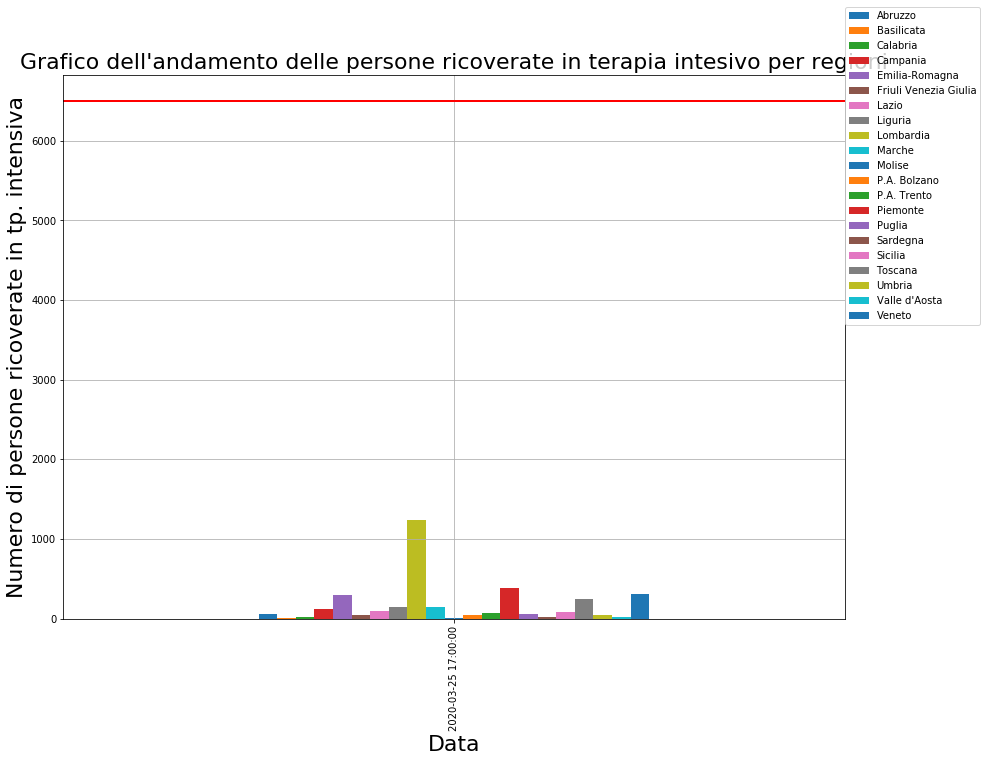

In [70]:
joinDF[joinDF['denominazione_regione']=='Abruzzo'].head(20).T

In [ ]:
g = sns.FacetGrid(terapiaIntsPerRegioni, col="data", height=4, aspect=.5)
g = g.map(plt.bar, "total_bill", bins=bins)

In [ ]:
g = sns.FacetGrid(terapiaIntsPerRegioni, col="data",  row="smoker")
g = g.map(plt.bar, "total_bill")

In [71]:
terapiaIntsPerRegioni

denominazione_regione,Abruzzo,Basilicata,Calabria,Campania,Emilia-Romagna,Friuli Venezia Giulia,Lazio,Liguria,Lombardia,Marche,...,P.A. Bolzano,P.A. Trento,Piemonte,Puglia,Sardegna,Sicilia,Toscana,Umbria,Valle d'Aosta,Veneto
data,,,,,,,,,,,,,,,,,,,,,
2020-02-24 18:00:00,0,0,0,0,2,0,1,0,19,0,...,0,0,0,0,0,0,0,0,0,4
2020-02-25 18:00:00,0,0,0,0,2,0,1,0,25,0,...,0,0,0,0,0,0,0,0,0,7
2020-02-26 18:00:00,0,0,0,0,3,0,0,0,25,0,...,0,0,0,0,0,0,0,0,0,8
2020-02-27 18:00:00,0,0,0,0,6,0,0,0,41,1,...,0,0,0,0,0,0,0,0,0,8
2020-02-28 18:00:00,0,0,0,0,6,0,0,0,47,2,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-14 17:00:00,6,1,2,19,122,2,79,35,297,18,...,7,9,116,24,10,12,68,1,0,26
2020-05-15 17:00:00,6,1,2,17,114,3,79,31,276,18,...,5,9,108,23,10,11,67,2,0,24
2020-05-16 17:00:00,7,1,2,16,112,3,76,26,268,17,...,5,8,100,22,10,12,66,2,0,20


In [35]:
joinDF[joinDF['denominazione_regione']=='Abruzzo'].head(20).T

,0,1,2,3,4,128,129,130,131,132,256,257,258,259,260,384,385,386,387,388
data,2020-02-24 18:00:00,2020-02-24 18:00:00,2020-02-24 18:00:00,2020-02-24 18:00:00,2020-02-24 18:00:00,2020-02-25 18:00:00,2020-02-25 18:00:00,2020-02-25 18:00:00,2020-02-25 18:00:00,2020-02-25 18:00:00,2020-02-26 18:00:00,2020-02-26 18:00:00,2020-02-26 18:00:00,2020-02-26 18:00:00,2020-02-26 18:00:00,2020-02-27 18:00:00,2020-02-27 18:00:00,2020-02-27 18:00:00,2020-02-27 18:00:00,2020-02-27 18:00:00
denominazione_regione,Abruzzo,Abruzzo,Abruzzo,Abruzzo,Abruzzo,Abruzzo,Abruzzo,Abruzzo,Abruzzo,Abruzzo,Abruzzo,Abruzzo,Abruzzo,Abruzzo,Abruzzo,Abruzzo,Abruzzo,Abruzzo,Abruzzo,Abruzzo
denominazione_provincia,Chieti,L'Aquila,Pescara,Teramo,In fase di definizione/aggiornamento,Chieti,L'Aquila,Pescara,Teramo,In fase di definizione/aggiornamento,Chieti,L'Aquila,Pescara,Teramo,In fase di definizione/aggiornamento,Chieti,L'Aquila,Pescara,Teramo,In fase di definizione/aggiornamento
lat,42.351,42.3512,42.4646,42.6589,0,42.351,42.3512,42.4646,42.6589,0,42.351,42.3512,42.4646,42.6589,0,42.351,42.3512,42.4646,42.6589,0
long,14.1675,13.3984,14.2136,13.7044,0,14.1675,13.3984,14.2136,13.7044,0,14.1675,13.3984,14.2136,13.7044,0,14.1675,13.3984,14.2136,13.7044,0
totale_casi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
ricoverati_con_sintomi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
terapia_intensiva,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
totale_ospedalizzati,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
isolamento_domiciliare,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


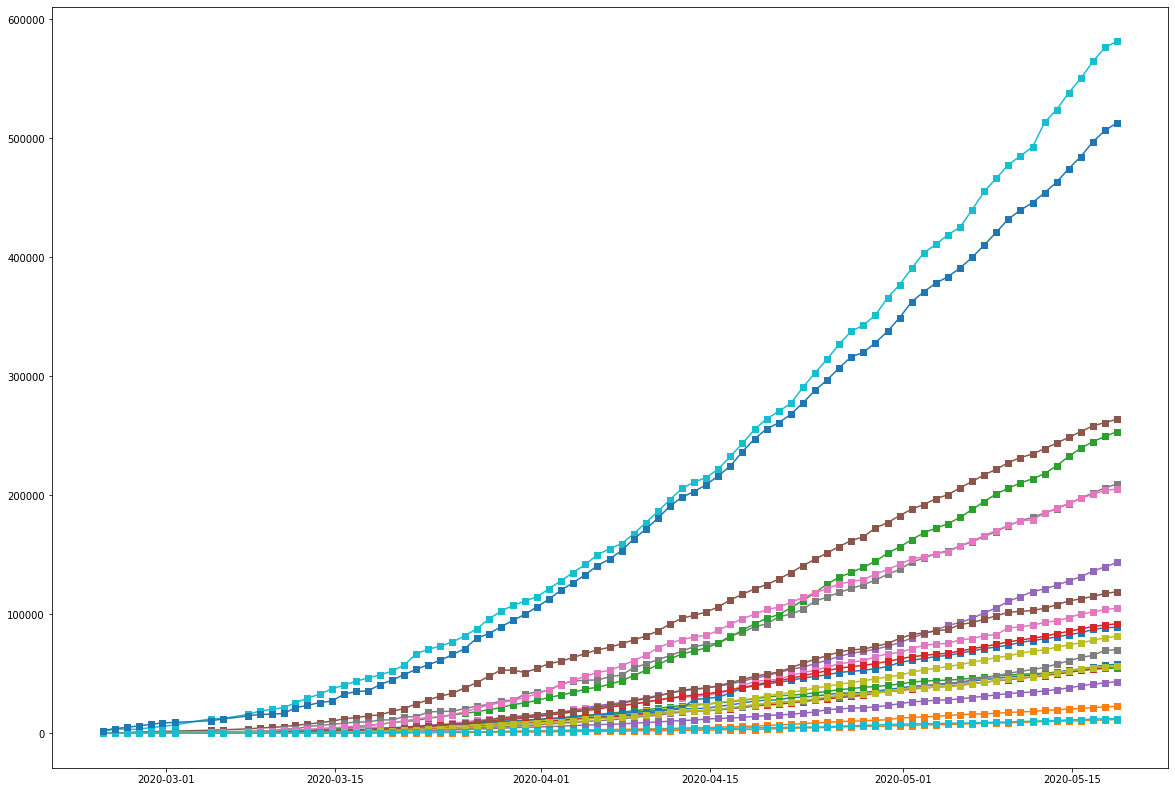

In [36]:
plt.figure(figsize=(20,14))
for regione in joinDF['denominazione_regione'].unique():
    plt.plot(joinDF[joinDF['denominazione_regione']==regione]['data'], joinDF[joinDF['denominazione_regione']==regione]['tamponi'], marker='s')

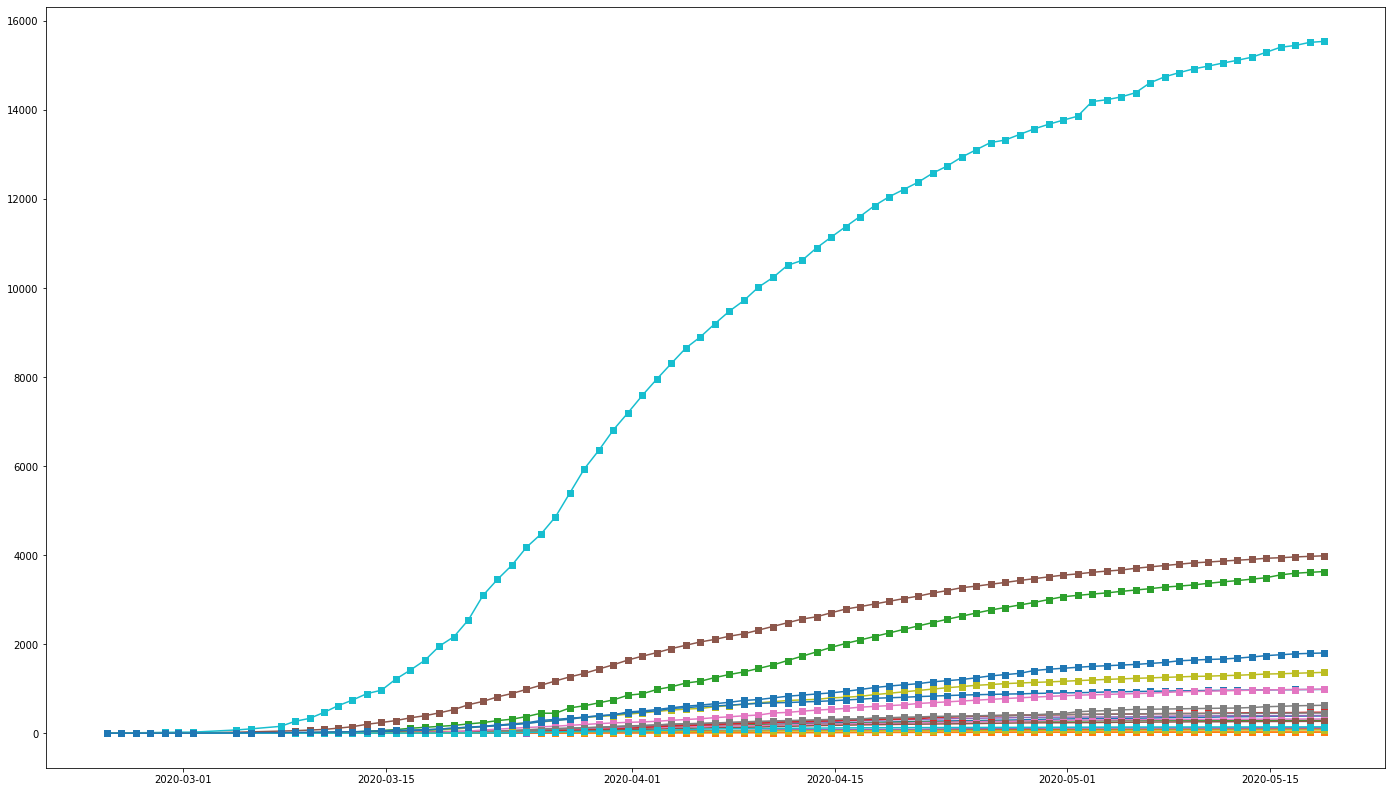

In [37]:
plt.figure(figsize=(24,14))
for regione in joinDF['denominazione_regione'].unique():
    plt.plot(joinDF[joinDF['denominazione_regione']==regione]['data'], joinDF[joinDF['denominazione_regione']==regione]['deceduti'], marker='s')

In [38]:
decedutiPerRegioni['Puglia'].head(50)

data
2020-02-24 18:00:00      0
2020-02-25 18:00:00      0
2020-02-26 18:00:00      0
2020-02-27 18:00:00      0
2020-02-28 18:00:00      0
2020-02-29 17:00:00      0
2020-03-01 17:00:00      0
2020-03-04 17:00:00      1
2020-03-05 17:00:00      1
2020-03-07 18:00:00      2
2020-03-08 18:00:00      3
2020-03-09 18:00:00      3
2020-03-10 18:00:00      3
2020-03-11 17:00:00      5
2020-03-12 17:00:00      5
2020-03-13 17:00:00      5
2020-03-14 17:00:00      8
2020-03-15 17:00:00     16
2020-03-16 17:00:00     16
2020-03-17 17:00:00     18
2020-03-18 17:00:00     19
2020-03-19 17:00:00     25
2020-03-20 17:00:00     26
2020-03-21 17:00:00     29
2020-03-22 17:00:00     31
2020-03-23 17:00:00     37
2020-03-24 17:00:00     44
2020-03-25 17:00:00     48
2020-03-26 17:00:00     65
2020-03-27 17:00:00     69
2020-03-28 17:00:00     71
2020-03-29 17:00:00     86
2020-03-30 17:00:00     91
2020-03-31 17:00:00    110
2020-04-01 17:00:00    129
2020-04-02 17:00:00    144
2020-04-03 17:00:00    

In [39]:
joinDF[joinDF['denominazione_regione']=='Puglia'].head(70).T

,79,80,81,82,83,84,85,207,208,209,...,1107,1108,1109,1231,1232,1233,1234,1235,1236,1237
data,2020-02-24 18:00:00,2020-02-24 18:00:00,2020-02-24 18:00:00,2020-02-24 18:00:00,2020-02-24 18:00:00,2020-02-24 18:00:00,2020-02-24 18:00:00,2020-02-25 18:00:00,2020-02-25 18:00:00,2020-02-25 18:00:00,...,2020-03-05 17:00:00,2020-03-05 17:00:00,2020-03-05 17:00:00,2020-03-07 18:00:00,2020-03-07 18:00:00,2020-03-07 18:00:00,2020-03-07 18:00:00,2020-03-07 18:00:00,2020-03-07 18:00:00,2020-03-07 18:00:00
denominazione_regione,Puglia,Puglia,Puglia,Puglia,Puglia,Puglia,Puglia,Puglia,Puglia,Puglia,...,Puglia,Puglia,Puglia,Puglia,Puglia,Puglia,Puglia,Puglia,Puglia,Puglia
denominazione_provincia,Bari,Barletta-Andria-Trani,Brindisi,Foggia,Lecce,Taranto,In fase di definizione/aggiornamento,Bari,Barletta-Andria-Trani,Brindisi,...,Lecce,Taranto,In fase di definizione/aggiornamento,Bari,Barletta-Andria-Trani,Brindisi,Foggia,Lecce,Taranto,In fase di definizione/aggiornamento
lat,41.1256,41.2271,40.6385,41.4623,40.3535,40.4735,0,41.1256,41.2271,40.6385,...,40.3535,40.4735,0,41.1256,41.2271,40.6385,41.4623,40.3535,40.4735,0
long,16.8674,16.2952,17.946,15.5431,18.1719,17.2324,0,16.8674,16.2952,17.946,...,18.1719,17.2324,0,16.8674,16.2952,17.946,15.5431,18.1719,17.2324,0
totale_casi,0,0,0,0,0,0,0,0,0,0,...,1,3,0,5,2,3,9,4,3,0
ricoverati_con_sintomi,0,0,0,0,0,0,0,0,0,0,...,5,5,5,9,9,9,9,9,9,9
terapia_intensiva,0,0,0,0,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,2,2
totale_ospedalizzati,0,0,0,0,0,0,0,0,0,0,...,6,6,6,11,11,11,11,11,11,11
isolamento_domiciliare,0,0,0,0,0,0,0,0,0,0,...,6,6,6,12,12,12,12,12,12,12


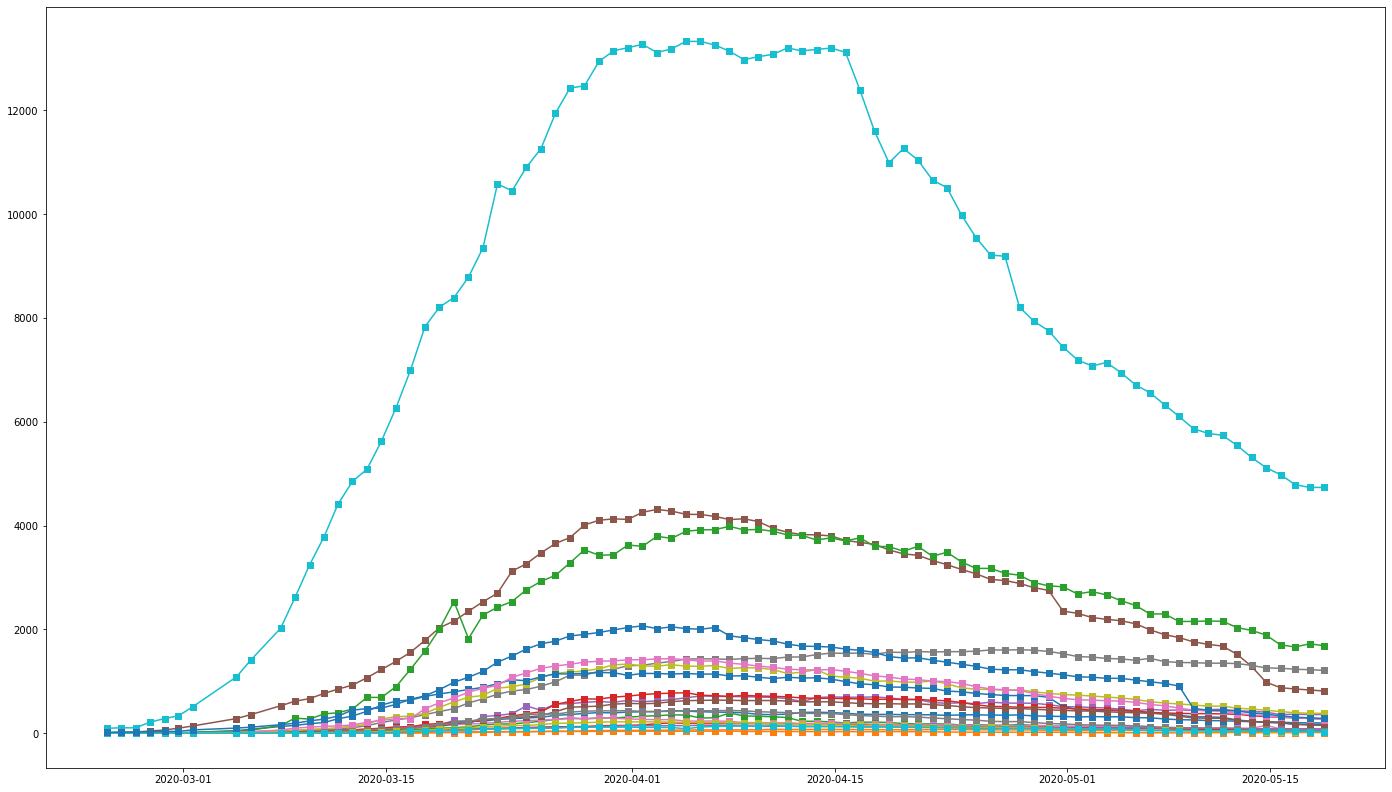

In [40]:
plt.figure(figsize=(24,14))
for regione in joinDF['denominazione_regione'].unique():
    plt.plot(joinDF[joinDF['denominazione_regione']==regione]['data'], joinDF[joinDF['denominazione_regione']==regione]['totale_ospedalizzati'], marker='s')
    

In [41]:
joinDF.groupby('data')['totale_ospedalizzati'].max()

data
2020-02-24 18:00:00      95
2020-02-25 18:00:00     104
2020-02-26 18:00:00     104
2020-02-27 18:00:00     213
2020-02-28 18:00:00     282
                       ... 
2020-05-14 17:00:00    5115
2020-05-15 17:00:00    4981
2020-05-16 17:00:00    4789
2020-05-17 17:00:00    4735
2020-05-18 17:00:00    4734
Name: totale_ospedalizzati, Length: 82, dtype: int64

In [42]:
joinDF.pivot_table(values=['totale_ospedalizzati'], index=['denominazione_regione'], columns=['data'], aggfunc='max')

totale_ospedalizzati                      \
data                   2020-02-24 18:00:00 2020-02-25 18:00:00   
denominazione_regione                                            
Abruzzo                                  0                   0   
Basilicata                               0                   0   
Calabria                                 0                   0   
Campania                                 0                   0   
Emilia-Romagna                          12                  17   
Friuli Venezia Giulia                    0                   0   
Lazio                                    2                   2   
Liguria                                  0                   1   
Lombardia                               95                 104   
Marche                                   0                   0   
Molise                                   0                   0   
P.A. Bolzano                             0                   1   
P.A. Trento                              0                   0   
Piemonte                                 2                   2   
Puglia                                   0                   0   
Sardegna                                 0                   0   
Sicilia                                  0                   1   
Toscana                                  0                   2   
Umbria                                   0                   0   
Valle d'Aosta                            0                   0   
Veneto                                  16                  19   

                                                               \
data                  2020-02-26 18:00:00 2020-02-27 18:00:00   
denominazione_regione                                           
Abruzzo                                 0                   1   
Basilicata                              0                   0   
Calabria                                0                   0   
Campania                                0                   2   
Emilia-Romagna                         23                  42   
Friuli Venezia Giulia                   0                   0   
Lazio                                   0                   0   
Liguria                                 6                   9   
Lombardia                             104                 213   
Marche                                  1                   3   
Molise                                  0                   0   
P.A. Bolzano                            1                   1   
P.A. Trento                             0                   0   
Piemonte                                2                   2   
Puglia                                  0                   1   
Sardegna                                0                   0   
Sicilia                                 1                   1   
Toscana                                 2                   2   
Umbria                                  0                   0   
Valle d'Aosta                           0                   0   
Veneto                                 24                  27   

                                                               \
data                  2020-02-28 18:00:00 2020-02-29 17:00:00   
denominazione_regione                                           
Abruzzo                                 1                   2   
Basilicata                              0                   0   
Calabria                                0                   0   
Campania                                2                   3   
Emilia-Romagna                         62                  97   
Friuli Venezia Giulia                   0                   0   
Lazio                                   0                   3   
Liguria                                 9                   5   
Lombardia                             282                 336   
Marche                                  5                   8   
Molise                         

In [43]:
joinDF.pivot_table(values=['totale_ospedalizzati'], index=['denominazione_regione'], columns=['data'], aggfunc='max')

totale_ospedalizzati                      \
data                   2020-02-24 18:00:00 2020-02-25 18:00:00   
denominazione_regione                                            
Abruzzo                                  0                   0   
Basilicata                               0                   0   
Calabria                                 0                   0   
Campania                                 0                   0   
Emilia-Romagna                          12                  17   
Friuli Venezia Giulia                    0                   0   
Lazio                                    2                   2   
Liguria                                  0                   1   
Lombardia                               95                 104   
Marche                                   0                   0   
Molise                                   0                   0   
P.A. Bolzano                             0                   1   
P.A. Trento                              0                   0   
Piemonte                                 2                   2   
Puglia                                   0                   0   
Sardegna                                 0                   0   
Sicilia                                  0                   1   
Toscana                                  0                   2   
Umbria                                   0                   0   
Valle d'Aosta                            0                   0   
Veneto                                  16                  19   

                                                               \
data                  2020-02-26 18:00:00 2020-02-27 18:00:00   
denominazione_regione                                           
Abruzzo                                 0                   1   
Basilicata                              0                   0   
Calabria                                0                   0   
Campania                                0                   2   
Emilia-Romagna                         23                  42   
Friuli Venezia Giulia                   0                   0   
Lazio                                   0                   0   
Liguria                                 6                   9   
Lombardia                             104                 213   
Marche                                  1                   3   
Molise                                  0                   0   
P.A. Bolzano                            1                   1   
P.A. Trento                             0                   0   
Piemonte                                2                   2   
Puglia                                  0                   1   
Sardegna                                0                   0   
Sicilia                                 1                   1   
Toscana                                 2                   2   
Umbria                                  0                   0   
Valle d'Aosta                           0                   0   
Veneto                                 24                  27   

                                                               \
data                  2020-02-28 18:00:00 2020-02-29 17:00:00   
denominazione_regione                                           
Abruzzo                                 1                   2   
Basilicata                              0                   0   
Calabria                                0                   0   
Campania                                2                   3   
Emilia-Romagna                         62                  97   
Friuli Venezia Giulia                   0                   0   
Lazio                                   0                   3   
Liguria                                 9                   5   
Lombardia                             282                 336   
Marche                                  5                   8   
Molise                         

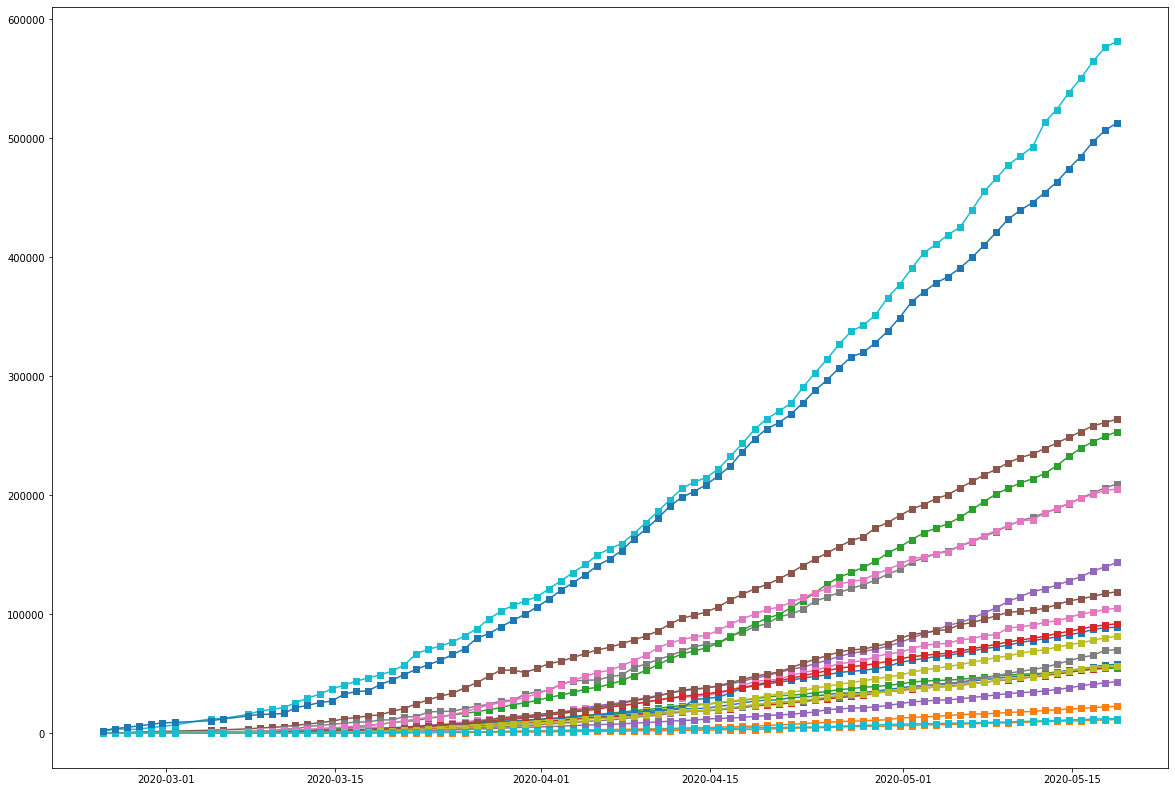

In [44]:
plt.figure(figsize=(20,14))
for regione in joinDF['denominazione_regione'].unique():
    plt.plot(joinDF[joinDF['denominazione_regione']==regione]['data'], joinDF[joinDF['denominazione_regione']==regione]['tamponi'], marker='s')

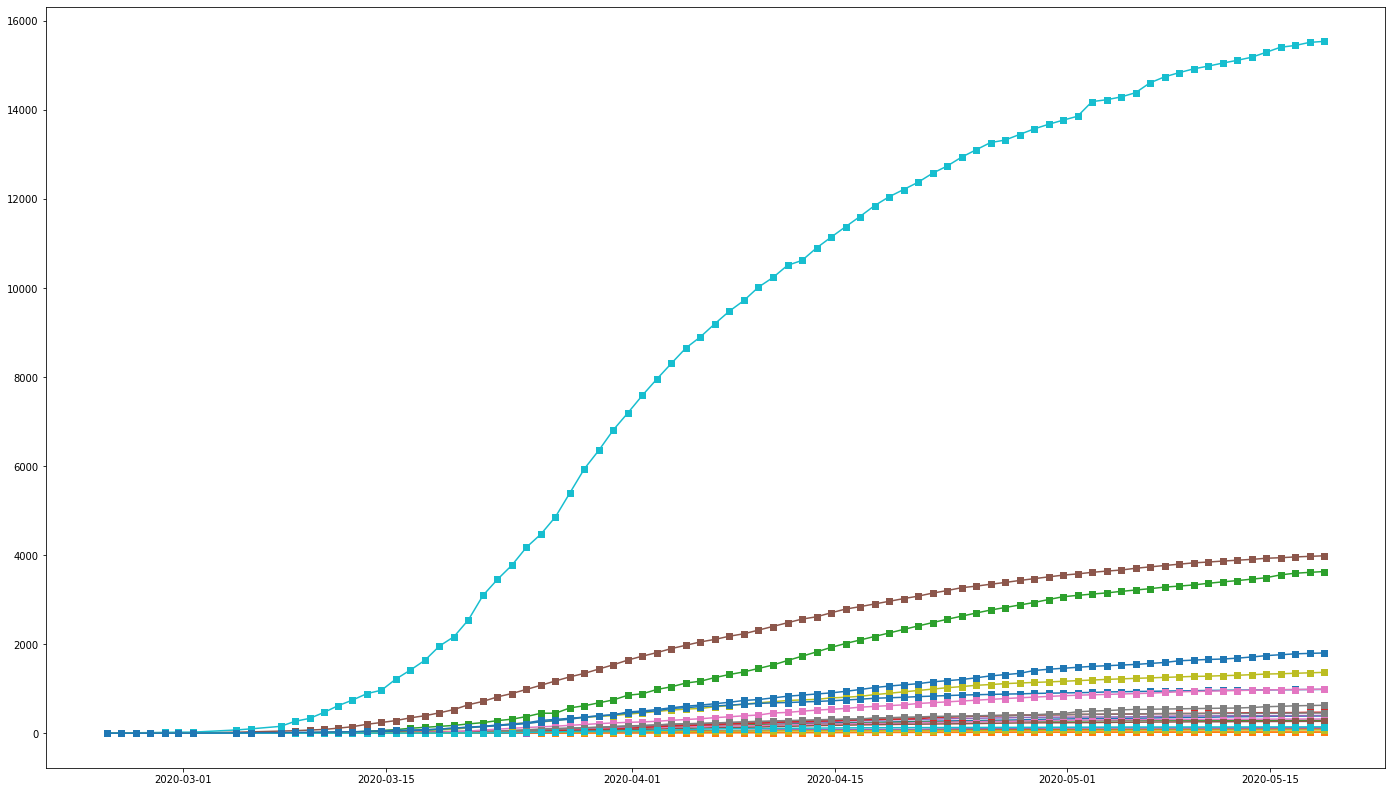

In [45]:
plt.figure(figsize=(24,14))
for regione in joinDF['denominazione_regione'].unique():
    plt.plot(joinDF[joinDF['denominazione_regione']==regione]['data'], joinDF[joinDF['denominazione_regione']==regione]['deceduti'], marker='s')

In [46]:
decedutiPerRegioni['Puglia'].head(50)

data
2020-02-24 18:00:00      0
2020-02-25 18:00:00      0
2020-02-26 18:00:00      0
2020-02-27 18:00:00      0
2020-02-28 18:00:00      0
2020-02-29 17:00:00      0
2020-03-01 17:00:00      0
2020-03-04 17:00:00      1
2020-03-05 17:00:00      1
2020-03-07 18:00:00      2
2020-03-08 18:00:00      3
2020-03-09 18:00:00      3
2020-03-10 18:00:00      3
2020-03-11 17:00:00      5
2020-03-12 17:00:00      5
2020-03-13 17:00:00      5
2020-03-14 17:00:00      8
2020-03-15 17:00:00     16
2020-03-16 17:00:00     16
2020-03-17 17:00:00     18
2020-03-18 17:00:00     19
2020-03-19 17:00:00     25
2020-03-20 17:00:00     26
2020-03-21 17:00:00     29
2020-03-22 17:00:00     31
2020-03-23 17:00:00     37
2020-03-24 17:00:00     44
2020-03-25 17:00:00     48
2020-03-26 17:00:00     65
2020-03-27 17:00:00     69
2020-03-28 17:00:00     71
2020-03-29 17:00:00     86
2020-03-30 17:00:00     91
2020-03-31 17:00:00    110
2020-04-01 17:00:00    129
2020-04-02 17:00:00    144
2020-04-03 17:00:00    

In [47]:
joinDF[joinDF['denominazione_regione']=='Puglia'].head(70).T

,79,80,81,82,83,84,85,207,208,209,...,1107,1108,1109,1231,1232,1233,1234,1235,1236,1237
data,2020-02-24 18:00:00,2020-02-24 18:00:00,2020-02-24 18:00:00,2020-02-24 18:00:00,2020-02-24 18:00:00,2020-02-24 18:00:00,2020-02-24 18:00:00,2020-02-25 18:00:00,2020-02-25 18:00:00,2020-02-25 18:00:00,...,2020-03-05 17:00:00,2020-03-05 17:00:00,2020-03-05 17:00:00,2020-03-07 18:00:00,2020-03-07 18:00:00,2020-03-07 18:00:00,2020-03-07 18:00:00,2020-03-07 18:00:00,2020-03-07 18:00:00,2020-03-07 18:00:00
denominazione_regione,Puglia,Puglia,Puglia,Puglia,Puglia,Puglia,Puglia,Puglia,Puglia,Puglia,...,Puglia,Puglia,Puglia,Puglia,Puglia,Puglia,Puglia,Puglia,Puglia,Puglia
denominazione_provincia,Bari,Barletta-Andria-Trani,Brindisi,Foggia,Lecce,Taranto,In fase di definizione/aggiornamento,Bari,Barletta-Andria-Trani,Brindisi,...,Lecce,Taranto,In fase di definizione/aggiornamento,Bari,Barletta-Andria-Trani,Brindisi,Foggia,Lecce,Taranto,In fase di definizione/aggiornamento
lat,41.1256,41.2271,40.6385,41.4623,40.3535,40.4735,0,41.1256,41.2271,40.6385,...,40.3535,40.4735,0,41.1256,41.2271,40.6385,41.4623,40.3535,40.4735,0
long,16.8674,16.2952,17.946,15.5431,18.1719,17.2324,0,16.8674,16.2952,17.946,...,18.1719,17.2324,0,16.8674,16.2952,17.946,15.5431,18.1719,17.2324,0
totale_casi,0,0,0,0,0,0,0,0,0,0,...,1,3,0,5,2,3,9,4,3,0
ricoverati_con_sintomi,0,0,0,0,0,0,0,0,0,0,...,5,5,5,9,9,9,9,9,9,9
terapia_intensiva,0,0,0,0,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,2,2
totale_ospedalizzati,0,0,0,0,0,0,0,0,0,0,...,6,6,6,11,11,11,11,11,11,11
isolamento_domiciliare,0,0,0,0,0,0,0,0,0,0,...,6,6,6,12,12,12,12,12,12,12


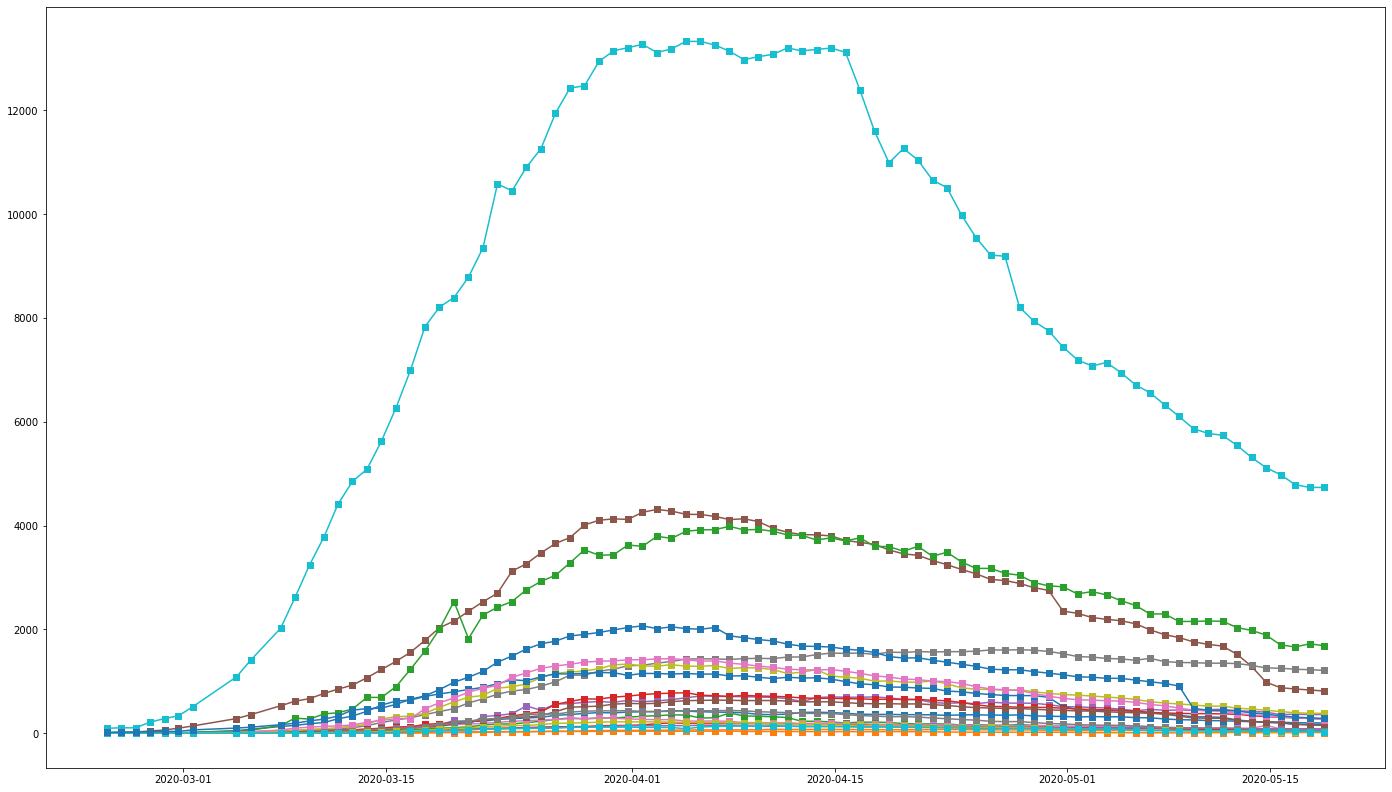

In [48]:
plt.figure(figsize=(24,14))
for regione in joinDF['denominazione_regione'].unique():
    plt.plot(joinDF[joinDF['denominazione_regione']==regione]['data'], joinDF[joinDF['denominazione_regione']==regione]['totale_ospedalizzati'], marker='s')
    

In [49]:
joinDF.groupby('data')['totale_ospedalizzati'].max()

data
2020-02-24 18:00:00      95
2020-02-25 18:00:00     104
2020-02-26 18:00:00     104
2020-02-27 18:00:00     213
2020-02-28 18:00:00     282
                       ... 
2020-05-14 17:00:00    5115
2020-05-15 17:00:00    4981
2020-05-16 17:00:00    4789
2020-05-17 17:00:00    4735
2020-05-18 17:00:00    4734
Name: totale_ospedalizzati, Length: 82, dtype: int64

In [50]:
joinDF.pivot_table(values=['totale_ospedalizzati'], index=['denominazione_regione'], columns=['data'], aggfunc='max')

totale_ospedalizzati                      \
data                   2020-02-24 18:00:00 2020-02-25 18:00:00   
denominazione_regione                                            
Abruzzo                                  0                   0   
Basilicata                               0                   0   
Calabria                                 0                   0   
Campania                                 0                   0   
Emilia-Romagna                          12                  17   
Friuli Venezia Giulia                    0                   0   
Lazio                                    2                   2   
Liguria                                  0                   1   
Lombardia                               95                 104   
Marche                                   0                   0   
Molise                                   0                   0   
P.A. Bolzano                             0                   1   
P.A. Trento                              0                   0   
Piemonte                                 2                   2   
Puglia                                   0                   0   
Sardegna                                 0                   0   
Sicilia                                  0                   1   
Toscana                                  0                   2   
Umbria                                   0                   0   
Valle d'Aosta                            0                   0   
Veneto                                  16                  19   

                                                               \
data                  2020-02-26 18:00:00 2020-02-27 18:00:00   
denominazione_regione                                           
Abruzzo                                 0                   1   
Basilicata                              0                   0   
Calabria                                0                   0   
Campania                                0                   2   
Emilia-Romagna                         23                  42   
Friuli Venezia Giulia                   0                   0   
Lazio                                   0                   0   
Liguria                                 6                   9   
Lombardia                             104                 213   
Marche                                  1                   3   
Molise                                  0                   0   
P.A. Bolzano                            1                   1   
P.A. Trento                             0                   0   
Piemonte                                2                   2   
Puglia                                  0                   1   
Sardegna                                0                   0   
Sicilia                                 1                   1   
Toscana                                 2                   2   
Umbria                                  0                   0   
Valle d'Aosta                           0                   0   
Veneto                                 24                  27   

                                                               \
data                  2020-02-28 18:00:00 2020-02-29 17:00:00   
denominazione_regione                                           
Abruzzo                                 1                   2   
Basilicata                              0                   0   
Calabria                                0                   0   
Campania                                2                   3   
Emilia-Romagna                         62                  97   
Friuli Venezia Giulia                   0                   0   
Lazio                                   0                   3   
Liguria                                 9                   5   
Lombardia                             282                 336   
Marche                                  5                   8   
Molise                         